<a href="https://colab.research.google.com/github/metsumesquita/ML-Python/blob/main/C%C3%B3pia_de_ML_comentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importar módulos:


In [ ]:
import numpy as np # Manipulação de arrays e uso de funções matemáticas
import pandas as pd # Manipulação de dados em dataframes;
import seaborn as sns # Visualização de dados
import matplotlib.pyplot as plt # Visualização de dados
from sklearn.model_selection import train_test_split # Dividir conjunto de dados em treino e teste
from sklearn.datasets import load_iris, load_wine # Importar as bases de dados iris e wine do scikit-learn
from sklearn.metrics import accuracy_score, plot_confusion_matrix # Métricas para a classificação
from sklearn.preprocessing import MinMaxScaler # Normalização
from sklearn.neural_network import MLPClassifier # MLP
# from tensorflow.keras.utils import to_categorical # Modificação do vetor de rótulos para dados categóricos
from sklearn.cluster import KMeans # KMEans

### 2. Importar a base de dados e visualizar dados:

In [ ]:
iris = load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
# Ver as estruturas do arquivo contendo os dados da base de dados
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# Construir o dataframe para manipulação e visualização dos dados
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [ ]:
# Resumo estatístico dos dados
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Nomes das classes
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Inserir a coluna de classes/rótulos no dataframe de dados
iris_df['species'] = iris['target']

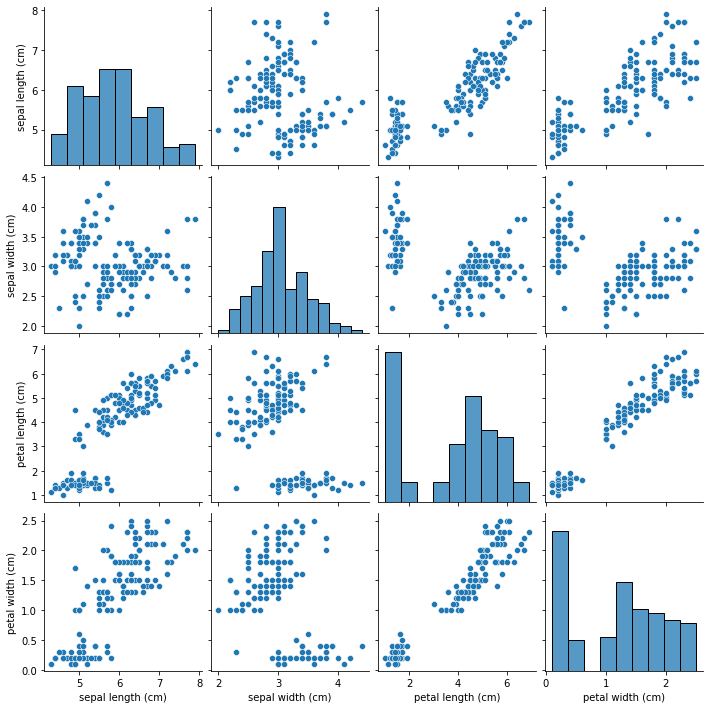

In [ ]:
# Construir o pairplot
# sns.pairplot(iris_df, hue='species', palette='tab10') # Com informação do rótulo
sns.pairplot(iris_df.drop(columns='species')) # Sem informação do rótulo

### 3. Organização da base de dados:

In [ ]:
# Definindo o array de atributos
X = iris['data']

In [ ]:
# Definindo o array de rótulos
y = iris['target']

In [ ]:
# Normalizando o array de atributos
X_norm = MinMaxScaler().fit_transform(X)

# Dividindo o array de atributos e o array de rótulos em conjuntos de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

### 4. Treinar e avaliar o modelo de classificação:

In [ ]:
# Criando e treinando o modelo de classificação baseado em MLP
mlp = MLPClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Realizando a predição dos dados de teste
y_prediction = mlp.predict(X_test)

In [ ]:
# Calculando o valor de acurácia do modelo de classificação
100*accuracy_score(y_test, y_prediction)

93.33333333333333

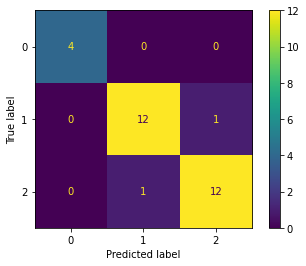

In [ ]:
# Construindo a matriz de confusão
plot_confusion_matrix(mlp, X_test, y_test) # , normalize='true') # Para valores da matriz normalizados

In [ ]:
# Obs: Para transformar (codificar) cada rótulo num vetor. Esta representação é útil em problemas de classificação com muitas classes
# Obs: Comparar com o que era antes
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


### 5. Agrupamento:

In [ ]:
# Definir e treinar o modelo KMeans com os dados presentes no vetor de atributos normalizados
km = KMeans(n_clusters=3).fit(X_norm)

In [ ]:
# Adicionar uma coluna de rótulos com os rótulos dos agrupamentos identificados pelo KMeans
new_iris_df = iris_df.copy()
new_iris_df['species'] = km.labels_

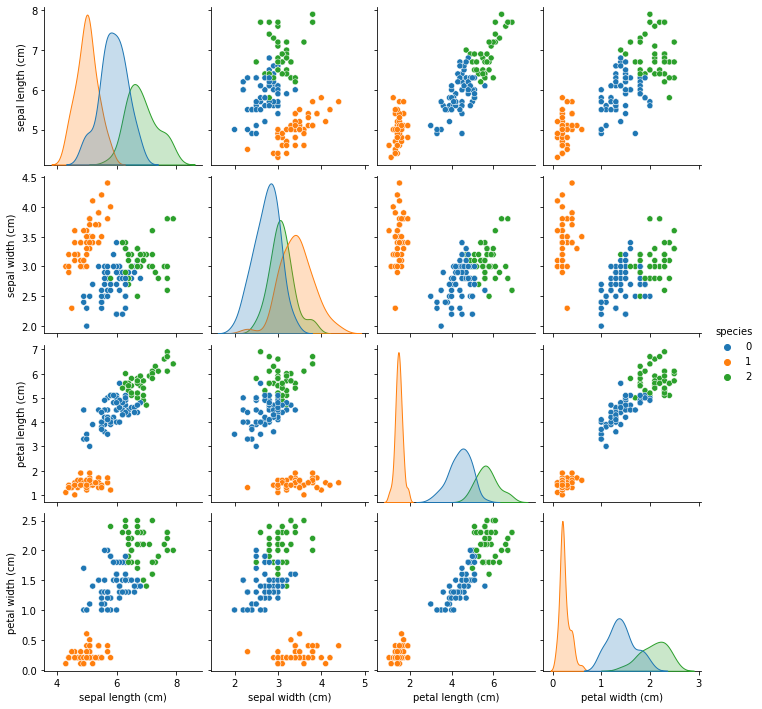

In [ ]:
# Visualizar os agrupamentos identificados pelo KMeans
sns.pairplot(new_iris_df, hue='species', palette='tab10')

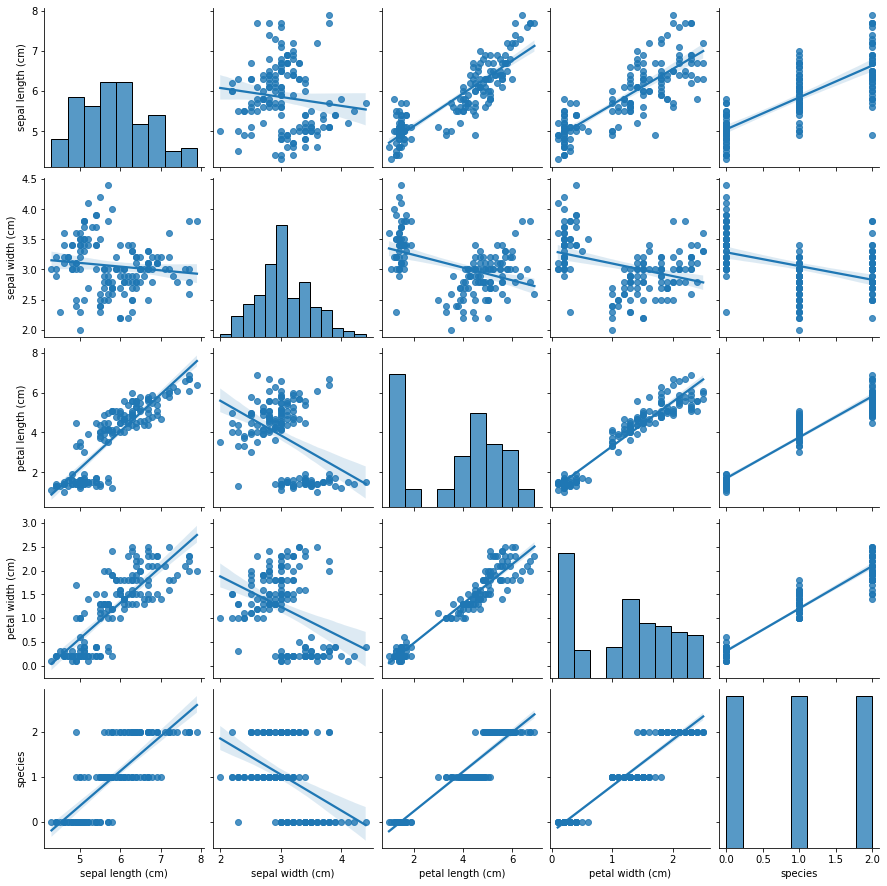

In [ ]:
# Obs: Exemplo de visualização com regressão
sns.pairplot(iris_df, palette='tab10', kind='reg')

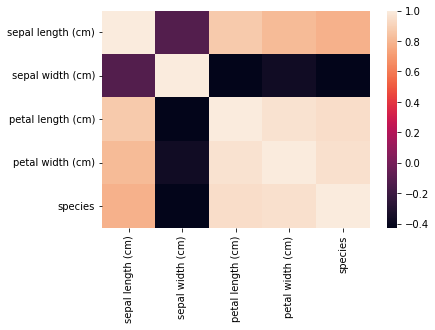

In [ ]:
# Exemplo de visualização de mapa de calor de correlação
sns.heatmap(iris_df.corr());